In [24]:
import pandas as pd
import numpy as np
import seaborn as sns

In [25]:
data = pd.read_csv("2019 Challenge.csv")
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


Check for missing data

In [3]:
data.isnull().values.sum()

0

In [4]:
print("There are",len(data),"rows")

There are 5000 rows


In [94]:
data['order_amount'].max()

704000

In [5]:
data.nunique()

order_id          5000
shop_id            100
user_id            301
order_amount       258
total_items          8
payment_method       3
created_at        4991
dtype: int64

# QUESTION 1A

In [90]:
print(data['order_amount'].sum()/len(data['order_amount']))

3145.128


The original AOV value in the description was calculated by simply taking the total Order Amount divided the numbe of rows, thus the number of transactions. This is problemtic because it doesn't account for the number of total items as shown above. 

According to most sources, AOV tracks the average dollar amount spent each time a customer places an order and is calculated by dividing the total revenue by the total number of order. As shown below, that results in $357.92 (shown below).

In [9]:
value = data['order_amount'].sum()/data['total_items'].sum()
print(value)

357.92152221412965


Alternatively, we could have also divided the Order Amount by the Total Items to get the average value of each specific order but that wouldn't have been wise because that assumes that in a given transaction with more item, all items costs the same amount (as shown below).

In [91]:
#data['amount / items'] = data['order_amount']/data['total_items']
#value1 = data['amount / items'].sum()/len(data)
#Value would have been $387.74

# QUESTION 1B & C

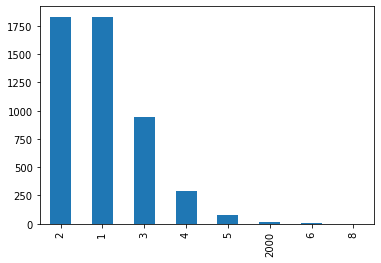

In [92]:
pd.value_counts(data['total_items']).plot.bar()

The distribution plot above shows us that the data is skewed because there was a transaction that had 2000 items, likely a bulk order. Consequently, it would be better to use the median as a metric because it filters out values that are skewing the results. As shown below, that results in $284.

In [11]:
data['order_amount'].median()

284.0

Furthermore, the description of the data showed us that there are 5000 different transactions, yet only 301 different users. This being said maybe we would want to look at the AOV for each of those 30 days and see how it evolves as a metric. This way, it would be easy to point out any outliers, such as the 2000 bulk order or it could help us spot a sudden rise in popularity. 


The average AOV per day is $ 377.8780865746204


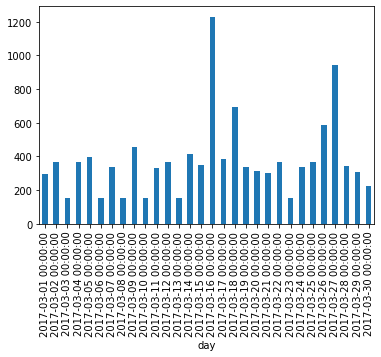

In [93]:
data['day']= data['created_at'].str[0:10]
data['day'].min()
data['day'] = data['day'].astype(str)
data['day']=pd.to_datetime(data['day'])
data.index=data['day'] 
df=data.groupby(pd.Grouper(freq='D')).sum() 
df = pd.DataFrame(data=df)
df['AOV'] = df['order_amount']/df['total_items']
df['AOV'].plot(kind='bar')
print("The average AOV per day is $", df['AOV'].mean())

As shown above, the AOV seems to be the same around the same for most days aside March 16th, 18th, 26th and 27th (the bulk order was likely on the 16th). Additionally, we calculated the average AOV per day to be $377.87.



Lastly, another interesting metric to look into would be the median revenue made per shop for each transaction they process. The calculation below shows us that on average (accounting for outliers), each shops makes $153 for every transaction over a 30-day period.  

In [103]:
shops = data.groupby("shop_id")
#avg_shop = shops['order_amount'].sum()
avg_shop = shops['order_amount'].sum()/shops['total_items'].sum()
avg_shop = avg_shop.median()
avg_shop

153.0